# Эмбеддинги

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Загрузка данных

In [2]:
data = pd.read_csv('lenta-ru-train.csv').iloc[:20000]
data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)
print('Размерность датасета ', data_train.shape)

Размерность датасета  (16000, 4)


In [3]:
data_train.head()

,title,text,topic,topic_label
5894,"Фурсенко пригрозил ""Амкару"" и ""Сатурну"" отправ...",Президент Российского футбольного союза (РФС) ...,Спорт,1
3728,Палаточный городок в Иране станет достопримеча...,Власти Ирана намерены отстроить заново палаточ...,Культура,3
8958,Voyager 2 достиг границы Солнечной системы,"Станция Voyager 2, возможно, приблизилась к гр...",Наука и техника,2
7671,"""Гарри Поттер и принц-полукровка"" установил но...","Фильм ""Гарри Поттер и принц-полукровка"" устано...",Культура,3
5999,Медведев вспомнил о расстрелах в связи со срыв...,Президент России Дмитрий Медведев поручил мини...,Наука и техника,2


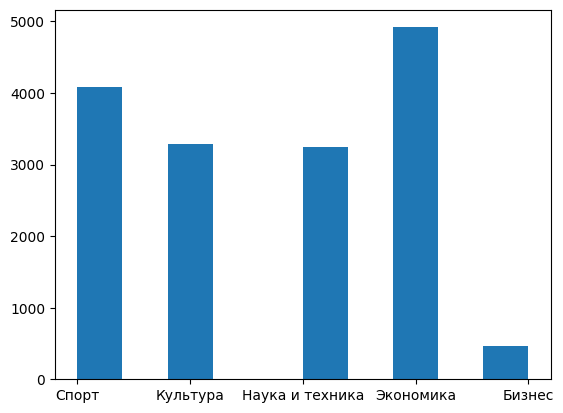

In [4]:
plt.hist(data_train['topic'])
plt.show()

# Подготовка данных



In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ultra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ultra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
stop_words = set(stopwords.words('russian'))

def preprocess(text):
    text = text.lower() # приводим к нижнему регистру
    text = ''.join([word for word in text if word not in string.punctuation]) # убираем пунктуацию
    tokens = word_tokenize(text) # токенизируем
    tokens = [word for word in tokens if word not in stop_words] # убираем стоп-слова
    return ' '.join(tokens)

In [7]:
%%time

X_train_clean = data_train['text'].apply(preprocess)
X_val_clean = data_val['text'].apply(preprocess)

CPU times: total: 953 ms
Wall time: 10.5 s


In [8]:
y_train = data_train['topic_label'].values
y_val = data_val['topic_label'].values

# Word2Vec

In [9]:
!pip install gensim

In [10]:
from gensim.models import word2vec

In [11]:
sentences_train = [text.split() for text in X_train_clean.values]
sentences_val = [text.split() for text in X_val_clean.values]

In [12]:
%%time
vector_size = 64
w2v_model = word2vec.Word2Vec(sentences=sentences_train, workers=4, vector_size=vector_size, min_count=5, window=5)

CPU times: total: 2.83 s
Wall time: 6.76 s


In [13]:
w2v_model.wv.get_vector("огонь")

array([ 2.38366961e-01, -3.46254528e-01,  4.41270113e-01,  3.05113941e-01,
       -1.97365340e-02, -3.19328010e-01,  2.75869101e-01, -5.66505343e-02,
       -2.46014908e-01, -6.36774898e-02,  3.61801952e-01, -2.56497443e-01,
       -1.78543881e-01, -1.37419134e-01, -2.14295357e-01,  2.86789984e-01,
       -5.27641118e-01,  9.74654257e-02, -7.59002492e-02,  4.70532328e-01,
        5.24063349e-01,  5.15382051e-01,  3.18502545e-01, -7.58835793e-01,
        7.63217509e-02,  3.85158122e-01, -3.75019938e-01,  1.13631189e-01,
       -1.96166992e-01, -1.62671015e-01,  6.66745752e-02,  1.79299608e-01,
       -2.25765556e-01, -3.23152304e-01, -2.00504720e-01,  7.36400932e-02,
       -1.33751491e-05, -1.25003025e-01,  1.28186002e-01,  1.15075864e-01,
        1.58336282e-01,  5.76326996e-02, -8.86845142e-02, -1.79496910e-02,
        3.54223222e-01, -9.61834788e-02, -1.45318717e-01, -2.99725473e-01,
       -8.19750801e-02,  4.27346408e-01,  2.49011237e-02,  1.29966989e-01,
        2.32125193e-01,  

In [14]:
w2v_model.wv.most_similar(positive=["кризис"])

[('экономический', 0.9631852507591248),
 ('безработицы', 0.9108715653419495),
 ('темпов', 0.9088663458824158),
 ('еврозоне', 0.8999066948890686),
 ('роста', 0.893976092338562),
 ('профицита', 0.8908212780952454),
 ('спаду', 0.8899465203285217),
 ('темпы', 0.8897415399551392),
 ('спада', 0.8884771466255188),
 ('экономики', 0.883297860622406)]

In [15]:
w2v_model.wv.most_similar(positive=["технологии"])

[('карты', 0.9477861523628235),
 ('материалов', 0.9242591857910156),
 ('различные', 0.9218950867652893),
 ('системой', 0.9195995926856995),
 ('использованием', 0.9164305329322815),
 ('космические', 0.9073157906532288),
 ('интернета', 0.9070830345153809),
 ('ими', 0.9058743715286255),
 ('данными', 0.9056973457336426),
 ('интернет', 0.9048739075660706)]

In [16]:
w2v_model.wv.similarity('спорт', 'кино')

0.24373558

In [17]:
w2v_model.wv.similarity('теннис', 'футбол')

0.7783647

In [18]:
w2v_model.wv.doesnt_match(['инфляция', 'ввп', 'гол'])

'гол'

In [19]:
def vectorize(sentences):
    X = []
    for sentence in sentences:
        sentence_vector = []
        for word in sentence:
            try:
                vector = w2v_model.wv.get_vector(word)
                sentence_vector.append(vector)
            except KeyError:
                # если слово не встретилось при обучениии модели word2vec
                pass
        if len(sentence_vector) > 0:
            sentence_vector = np.array(sentence_vector).mean(axis=0)
        else:
            # вернем нулевой вектор для новости, у которой ни одно слово не встречалось в обучении
            sentence_vector = np.zeros(vector_size)
        X.append(sentence_vector)
    return np.array(X)

In [20]:
W2V_train = vectorize(sentences_train)
W2V_val = vectorize(sentences_val)

In [21]:
W2V_train[:5, :10]

array([[ 0.43924204, -0.27259484,  0.60881037,  0.78805298, -0.21709558,
        -0.27385408,  0.38741589, -0.27239859, -0.51919574, -0.15570281],
       [ 0.40911284, -0.37249213,  0.21913186,  0.10005505,  0.0521932 ,
        -0.50821429,  0.07109503, -0.36878785, -0.40068871,  0.11857443],
       [ 0.58314031, -0.59106106,  0.53904355, -0.20556878,  0.09395826,
        -0.89773768,  0.1007404 , -0.53548265, -0.92829108,  0.03107297],
       [ 0.74228501, -0.49697134,  0.39601624, -0.81490642, -0.14501978,
        -1.00942254,  0.20253047, -0.14581518, -0.73353273,  0.58377206],
       [ 0.49692729, -0.48414251,  0.47298542,  0.2291535 , -0.17181347,
        -0.75527662, -0.03021659, -0.67274404, -0.71765763, -0.31635591]])

# Визуализация эмбеддингов

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(W2V_train)

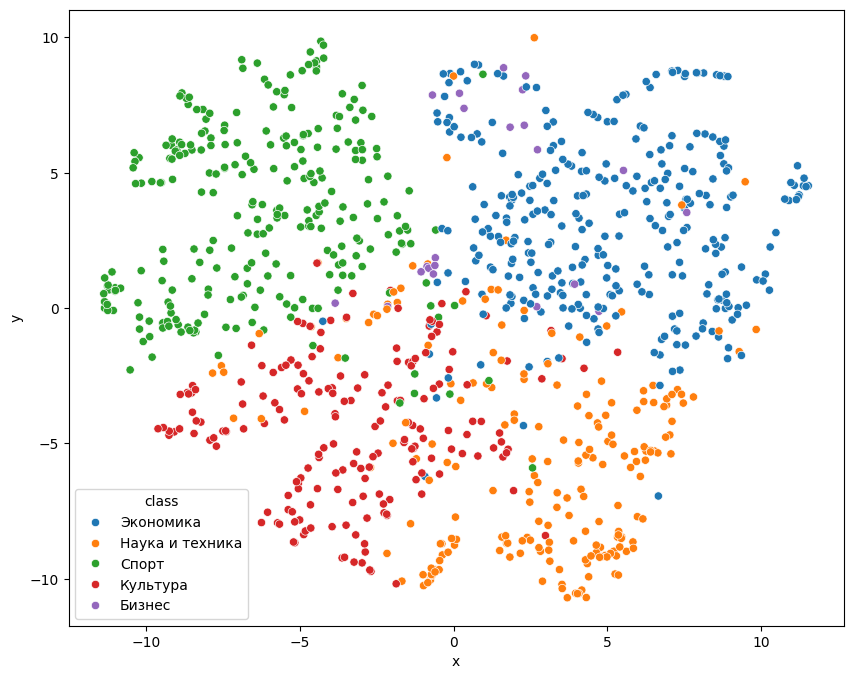

In [23]:
data_viz = {
    'x': tsne_results[:,0],
    'y': tsne_results[:,1],
    'class': data_train['topic'].values,
}

df_viz = pd.DataFrame(data_viz)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_viz.sample(1000), x='x', y='y', hue='class')
plt.show()

# Обучим модель

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(W2V_train, y_train)

y_pred = model.predict(W2V_val)
score = accuracy_score(y_val, y_pred)

print('Доля правильных ответов Word2Vec + лог. регрессии ', round(score, 3))

Доля правильных ответов Word2Vec + лог. регрессии  0.911
